In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Military%20Spending%20of%20Countries%20(1960-2019)/Military%20Expenditure.csv")

In [2]:
df.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2939585.501,NaN,NaN,3341271.551,3581366.351,4203664.569,5393251.216,6127288.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125111557.5,1.227272e+08,1.313462e+08,2.195802e+08,2.405326e+08,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343271609.1,504712881.9,497359449.2,618891637.1,668493883.3,778628250.6,1.066248e+09,1.146467e+09,1.156494e+09,1.487399e+09,1.469383e+09,1.948559e+09,1.751153e+09,1.031248e+09,7.941388e+08,1.774398e+09,5.949912e+08,2.338437e+08,1.597419e+08,456780475.0,1.702783e+08,1.066589e+09,5.836213e+08,4.042991e+08,438686245.4,6.700212e+08,817533582.2,1.365055e+09,1.970309e+09,2.032433e+09,3.163591e+09,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.155966e+07,3.928984e+07,4.964950e+07,5.090752e+07,4.571336e+07,29825492.0,3.363805e+07,4.278421e+07,4.536250e+07,5.323205e+07,58649352.5,7.614288e+07,100922358.4,1.101409e+08,1.409839e+08,1.948403e+08,2.556780e+08,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_br = df[df.Name == "Brazil"]
df_br = df_br.drop(["Code", "Type", "Indicator Name"], axis=1)
df_br = df_br.set_index("Name")
df_br

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brazil,382729752.1,342339720.8,387449035.5,441999606.2,354227857.1,632869026.5,718216574.6,746139163.6,755307566.7,816622811.0,1.026234e+09,1.075071e+09,1.195501e+09,1.512671e+09,1.790114e+09,2.141127e+09,2.576477e+09,2.499645e+09,2.690623e+09,2.829161e+09,2.259307e+09,2.517860e+09,3.031329e+09,2.082669e+09,2.013152e+09,2.687050e+09,2.758187e+09,4.323675e+09,5.874168e+09,8.761487e+09,9.236297e+09,6.694665e+09,4.993804e+09,7.099899e+09,1.059150e+10,1.431892e+10,1.407323e+10,1.393427e+10,1.435736e+10,9.866974e+09,1.134403e+10,1.093023e+10,9.664562e+09,8.392906e+09,9.780112e+09,1.358862e+10,1.640487e+10,2.048576e+10,2.445290e+10,2.564881e+10,3.400294e+10,3.693621e+10,3.398701e+10,3.287479e+10,3.265961e+10,2.461770e+10,2.422475e+10,2.928305e+10,2.776643e+10


In [4]:
df_br.isnull().sum().sum()

0

In [5]:
df_br.columns.unique()

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [6]:
len(df_br.columns.unique()) == len(df_br.columns)

True

In [7]:
df_br = df_br.transpose()

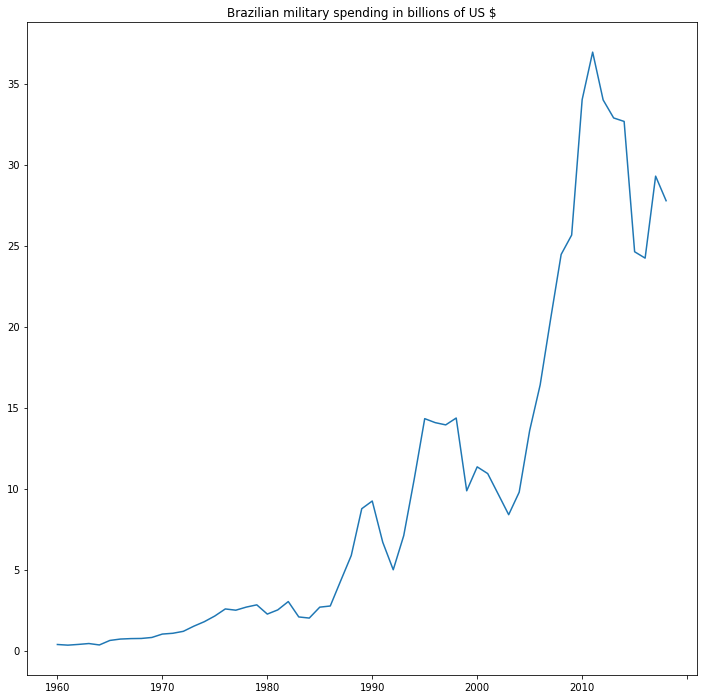

In [8]:
df_br.div(10**9).plot(figsize=(12,12), legend=False, title="Brazilian military spending in billions of US $");

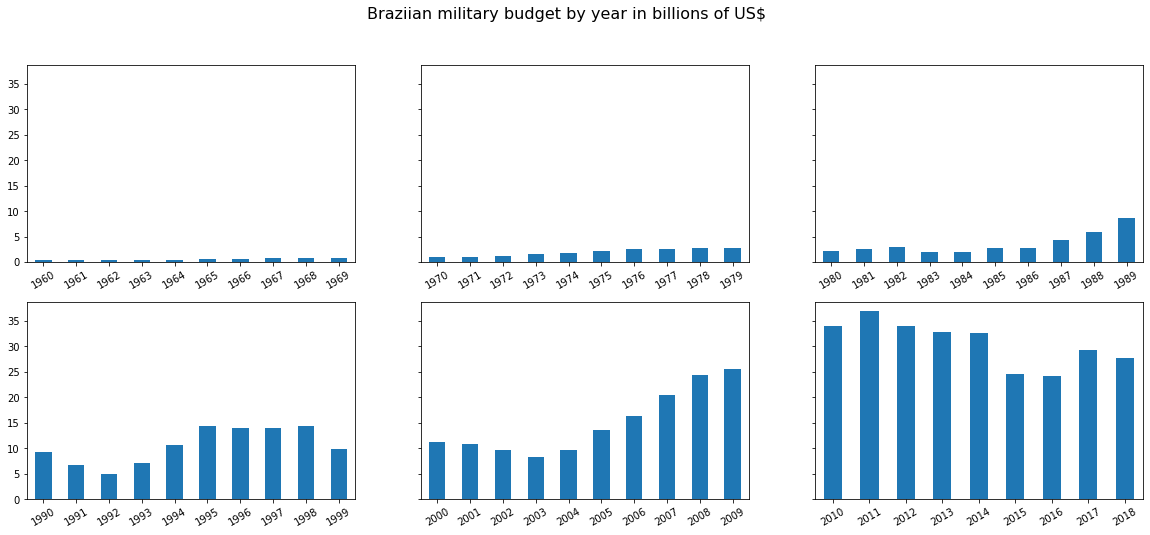

In [9]:
decades = ["196", "197", "198", "199", "200", "201"]
rows = 2
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,8), sharey=True)
fig.suptitle("Braziian military budget by year in billions of US$", fontsize=16)

for i, decade in enumerate(decades):
    a, b = divmod(i, cols)
    df_decade = df_br[df_br.transpose().columns.str.startswith(decade)]
    df_decade.div(10**9).plot.bar(ax=axes[a,b], legend=False, rot=30)

In [10]:
_df = df_br.transpose()
df_pre_2k = _df.loc[:, _df.columns.str.startswith("19")].transpose()
df_pos_2k = _df.loc[:, _df.columns.str.startswith("20")].transpose()

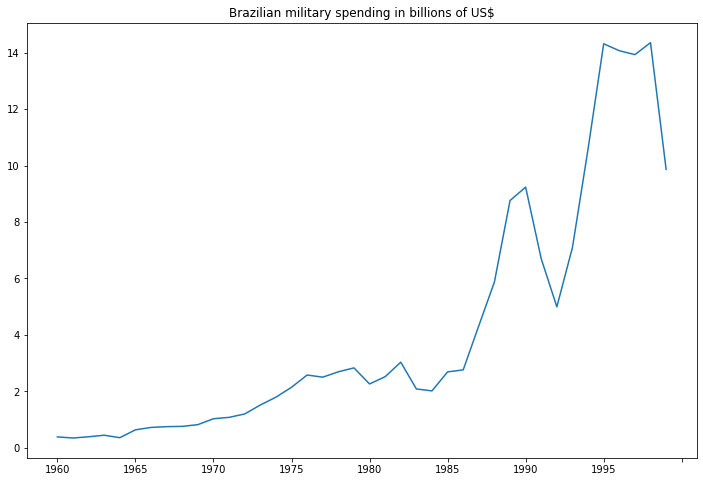

In [11]:
df_pre_2k.div(10**9).plot(figsize=(12,8), legend=False, title="Brazilian military spending in billions of US$");

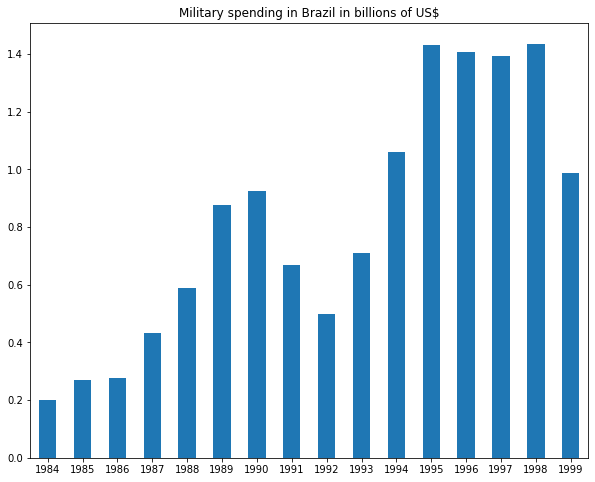

In [12]:
_years = tuple([str(y) for y in list(range(1984, 2000))])
df_80s = df_pre_2k.transpose()
df_80s = df_80s.loc[:, df_80s.columns.str.startswith(_years)].transpose().div(10)
df_80s.div(10**9).plot.bar(figsize=(10,8), legend=False, rot=0, title="Military spending in Brazil in billions of US$");

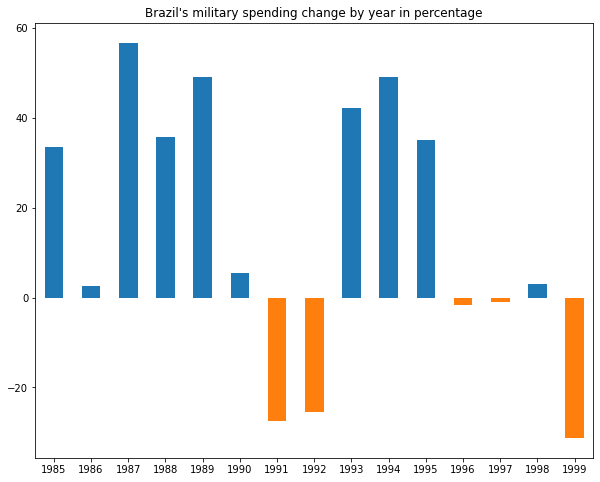

In [13]:
pct_serie = df_80s.transpose().iloc[0].pct_change()
pct_serie[1:].multiply(100).plot.bar(figsize=(10,8), rot=0, title="Brazil's military spending change by year in percentage", color=(pct_serie[1:] > 0).map({True: 'C0', False: 'C1'}));